In [1]:
path = os.getcwd()
print(path)

/Users/abnerteng/GitHub/TMBA-projects/src


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time

plt.style.use('ggplot')

In [4]:
path = os.getcwd()
print(path)

/Users/abnerteng/GitHub/TMBA-projects/src


In [5]:
df = pd.read_csv('/Users/abnerteng/GitHub/TMBA-projects/data/TWF_Futures_Minute_Trade.txt')
df

,Date,Time,Open,High,Low,Close,TotalVolume
0,2009/1/5,08:46:00,4722.0,4745.0,4714.0,4727.0,1493
1,2009/1/5,08:47:00,4727.0,4728.0,4711.0,4716.0,608
2,2009/1/5,08:48:00,4713.0,4720.0,4713.0,4716.0,400
3,2009/1/5,08:49:00,4717.0,4722.0,4715.0,4718.0,457
4,2009/1/5,08:50:00,4719.0,4721.0,4718.0,4719.0,233
...,...,...,...,...,...,...,...
1971251,2022/5/23,09:10:00,16210.0,16216.0,16206.0,16214.0,452
1971252,2022/5/23,09:11:00,16215.0,16215.0,16207.0,16210.0,224
1971253,2022/5/23,09:12:00,16210.0,16220.0,16207.0,16218.0,478
1971254,2022/5/23,09:13:00,16218.0,16220.0,16212.0,16218.0,240


In [8]:
df.index = pd.to_datetime(df['Date']+' '+df['Time'])
df = df.drop(columns = ['Date', 'Time'])
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df['Hour'] = df.index.map(lambda x: x.hour)
df.head()

,Open,High,Low,Close,Volume,Hour
2009-01-05 08:46:00,4722.0,4745.0,4714.0,4727.0,1493,8
2009-01-05 08:47:00,4727.0,4728.0,4711.0,4716.0,608,8
2009-01-05 08:48:00,4713.0,4720.0,4713.0,4716.0,400,8
2009-01-05 08:49:00,4717.0,4722.0,4715.0,4718.0,457,8
2009-01-05 08:50:00,4719.0,4721.0,4718.0,4719.0,233,8


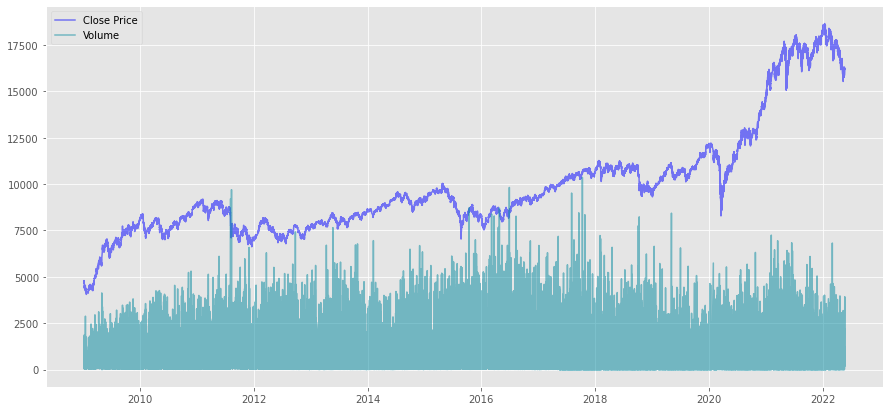

In [11]:
plt.figure(figsize = (15, 7))
plt.plot(df['Close'], color = 'blue', alpha = 0.5, label = 'Close Price')
plt.plot(df['Volume'], color = '#01889f', alpha = 0.5, label = 'Volume')
plt.legend()
plt.show()

In [14]:
rule = '3T'
Morning = df[(df['Hour'] >= 8) & (df['Hour'] <= 13)] ## 日盤
Morning.index = Morning.index + dt.timedelta(minutes = 15)
Morning.iloc[0:8]

,Open,High,Low,Close,Volume,Hour
2009-01-05 09:01:00,4722.0,4745.0,4714.0,4727.0,1493,8
2009-01-05 09:02:00,4727.0,4728.0,4711.0,4716.0,608,8
2009-01-05 09:03:00,4713.0,4720.0,4713.0,4716.0,400,8
2009-01-05 09:04:00,4717.0,4722.0,4715.0,4718.0,457,8
2009-01-05 09:05:00,4719.0,4721.0,4718.0,4719.0,233,8
2009-01-05 09:06:00,4720.0,4725.0,4719.0,4719.0,319,8
2009-01-05 09:07:00,4721.0,4722.0,4716.0,4718.0,316,8
2009-01-05 09:08:00,4717.0,4719.0,4712.0,4715.0,263,8


In [16]:
Morning.resample(rule = rule, closed = 'right', label = 'left').first()['Open'].iloc[0:3]

2009-01-05 09:00:00    4722.0
2009-01-05 09:03:00    4717.0
2009-01-05 09:06:00    4721.0
Freq: 3T, Name: Open, dtype: float64

In [17]:
rule = '60T'
Morning = df[(df['Hour'] >= 8) & (df['Hour'] <= 13)] ## 日盤
Morning.index = Morning.index + dt.timedelta(minutes = 15)

d1 = Morning.resample(rule = rule, closed = 'right', label = 'left').first()['Open']
d2 = Morning.resample(rule = rule, closed = 'right', label = 'left').max()['High']
d3 = Morning.resample(rule = rule, closed = 'right', label = 'left').min()['Low']
d4 = Morning.resample(rule = rule, closed = 'right', label = 'left').last()['Close']
d5 = Morning.resample(rule = rule, closed = 'right', label = 'left').sum()['Volume']

df_Morning = pd.concat([d1, d2, d3, d4, d5], axis = 1)
df_Morning = df_Morning.dropna()
df_Morning.index = df_Morning.index - dt.timedelta(minutes = 15)
df_Morning.head()

,Open,High,Low,Close,Volume
2009-01-05 08:45:00,4722.0,4797.0,4692.0,4758.0,27508
2009-01-05 09:45:00,4759.0,4767.0,4710.0,4732.0,15701
2009-01-05 10:45:00,4732.0,4733.0,4634.0,4670.0,25172
2009-01-05 11:45:00,4672.0,4688.0,4636.0,4680.0,13241
2009-01-05 12:45:00,4680.0,4698.0,4656.0,4670.0,16247


In [19]:
rule = '60T'
Night = df[(df['Hour'] < 8) | (df['Hour'] > 13)] ## 夜盤

d1 = Night.resample(rule = rule, closed = 'right', label = 'left').first()['Open']
d2 = Night.resample(rule = rule, closed = 'right', label = 'left').max()['High']
d3 = Night.resample(rule = rule, closed = 'right', label = 'left').min()['Low']
d4 = Night.resample(rule = rule, closed = 'right', label = 'left').last()['Close']
d5 = Night.resample(rule = rule, closed = 'right', label = 'left').sum()['Volume']

df_Night = pd.concat([d1, d2, d3, d4, d5], axis = 1)
df_Night = df_Night.dropna()
df_Night.head()

,Open,High,Low,Close,Volume
2017-05-15 15:00:00,10023.0,10034.0,10020.0,10033.0,925
2017-05-15 16:00:00,10032.0,10032.0,10028.0,10030.0,300
2017-05-15 17:00:00,10030.0,10030.0,10026.0,10027.0,137
2017-05-15 18:00:00,10026.0,10028.0,10025.0,10027.0,148
2017-05-15 19:00:00,10028.0,10030.0,10028.0,10030.0,40


In [20]:
df_Day = pd.concat([df_Morning, df_Night], axis = 0)
df_Day = df_Day.sort_index(ascending = True)
df_Day.head()

,Open,High,Low,Close,Volume
2009-01-05 08:45:00,4722.0,4797.0,4692.0,4758.0,27508
2009-01-05 09:45:00,4759.0,4767.0,4710.0,4732.0,15701
2009-01-05 10:45:00,4732.0,4733.0,4634.0,4670.0,25172
2009-01-05 11:45:00,4672.0,4688.0,4636.0,4680.0,13241
2009-01-05 12:45:00,4680.0,4698.0,4656.0,4670.0,16247


In [22]:
df_day = df.loc['2017-05-15':].copy()
df_day.index = df_day.index - dt.timedelta(hours = 8)

d1 = df_day.resample(rule = '1D', closed = 'right', label = 'left').first()['Open']
d2 = df_day.resample(rule = '1D', closed = 'right', label = 'left').max()['High']
d3 = df_day.resample(rule = '1D', closed = 'right', label = 'left').min()['Low']
d4 = df_day.resample(rule = '1D', closed = 'right', label = 'left').last()['Close']
d5 = df_day.resample(rule = '1D', closed = 'right', label = 'left').sum()['Volume']

df_day = pd.concat([d1, d2, d3, d4, d5], axis = 1)
df_day = df_day.dropna()
df_day.index = df_day.index + dt.timedelta(days = 1)
df_day.tail()

,Open,High,Low,Close,Volume
2022-05-18,15978.0,16189.0,15963.0,16184.0,125318
2022-05-19,16180.0,16318.0,15889.0,15902.0,125423
2022-05-20,15871.0,16054.0,15748.0,15999.0,224892
2022-05-21,16069.0,16225.0,15852.0,16151.0,199316
2022-05-24,16220.0,16263.0,16204.0,16216.0,17891


In [26]:
df_Morning['Hour'] = df_Morning.index.map(lambda x: x.hour)

trainData = df_Morning[(df_Morning.index >= '2011-01-01 00:00:00') & (df_Morning.index <= '2019-12-31 00:00:00')].copy()
testData = df_Morning[(df_Morning.index >= '2020-01-01 00:00:00') & (df_Morning.index <= '2022-05-22 00:00:00')].copy()

In [27]:
trainData.head()

,Open,High,Low,Close,Volume,Hour
2011-01-03 08:45:00,9000.0,9029.0,8995.0,9005.0,20508,8
2011-01-03 09:45:00,9005.0,9014.0,8997.0,9011.0,9022,9
2011-01-03 10:45:00,9010.0,9030.0,9010.0,9023.0,12537,10
2011-01-03 11:45:00,9024.0,9026.0,9014.0,9017.0,7529,11
2011-01-03 12:45:00,9016.0,9024.0,9009.0,9019.0,11769,12


In [29]:
testData.tail()

,Open,High,Low,Close,Volume,Hour
2022-05-20 08:45:00,16069.0,16110.0,16013.0,16092.0,32305,8
2022-05-20 09:45:00,16091.0,16124.0,16062.0,16105.0,19768,9
2022-05-20 10:45:00,16104.0,16140.0,16104.0,16134.0,12993,10
2022-05-20 11:45:00,16134.0,16140.0,16113.0,16128.0,7654,11
2022-05-20 12:45:00,16129.0,16145.0,16110.0,16135.0,12758,12


In [30]:
settlementDate = pd.read_csv('/Users/abnerteng/GitHub/TMBA-projects/data/settlementDate.csv')
settlementDate.columns = ['settlementDate', 'futures', 'settlementPrice']
settlementDate

,settlementDate,futures,settlementPrice
0,2022/08/03,202208W1,14707
1,2022/07/27,202207W4,14887
2,2022/07/20,202207,14713
3,2022/07/13,202207W2,14384
4,2022/07/06,202207W1,14015
...,...,...,...
508,2009/12/16,200912,7752
509,2009/11/18,200911,7786
510,2009/10/21,200910,7705
511,2009/09/16,200909,7445


In [31]:
bool = [False if 'W' in i else True for i in settlementDate['futures']]

In [32]:
settlementDate = [i.replace('/','-') for i in list(settlementDate[bool]['settlementDate'])]
settlementDate = [pd.to_datetime(i).date() for i in settlementDate]
settlementDate[-5:]

[datetime.date(2009, 12, 16),
 datetime.date(2009, 11, 18),
 datetime.date(2009, 10, 21),
 datetime.date(2009, 9, 16),
 datetime.date(2009, 8, 19)]

In [34]:
fund = 1000000
fee = 600
length = 20
time_std = 2
slpoint = 0.05

trainData['SMA'] = trainData['Close'].rolling(window = length, center = False).mean()
trainData['std'] = trainData['Close'].rolling(window = length, center = False).std()
trainData['BBU'] = trainData['SMA'] + time_std * trainData['std']
trainData['BBL'] = trainData['SMA'] - time_std * trainData['std']
trainData['BBW'] = (trainData['BBU'] - trainData['BBL']) / trainData['SMA']

trainData.tail()

,Open,High,Low,Close,Volume,Hour,SMA,std,BBU,BBL,BBW
2019-12-30 08:45:00,12091.0,12125.0,12080.0,12110.0,24685,8,12032.95,46.266363,12125.482725,11940.417275,0.015380
2019-12-30 09:45:00,12110.0,12112.0,12076.0,12097.0,13297,9,12037.05,48.185470,12133.420939,11940.679061,0.016012
2019-12-30 10:45:00,12096.0,12108.0,12089.0,12104.0,6348,10,12041.80,49.925840,12141.651679,11941.948321,0.016584
2019-12-30 11:45:00,12103.0,12110.0,12099.0,12107.0,3898,11,12047.30,50.782405,12148.864810,11945.735190,0.016861
2019-12-30 12:45:00,12108.0,12109.0,12065.0,12069.0,17832,12,12051.60,48.647389,12148.894777,11954.305223,0.016146


In [36]:
df_arr = np.array(trainData)
time_arr = np.array(trainData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

In [37]:
df_arr[1,3]

9011.0

In [38]:
df_arr[-1,3]

12069.0

In [39]:
np.mean(trainData['BBW'])

0.02614919199967537

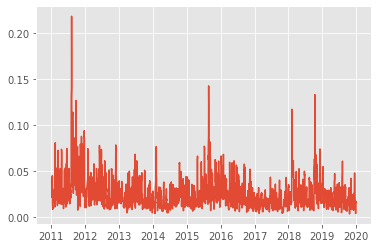

In [40]:
plt.plot(trainData['BBW'])

In [42]:
fund = 1000000
fee = 600
length = 20
time_std = 2
slpoint = 0.05

trainData['SMA'] = trainData['Close'].rolling(window = length, center = False).mean()
trainData['std'] = trainData['Close'].rolling(window = length, center = False).std()
trainData['BBU'] = trainData['SMA'] + time_std * trainData['std']
trainData['BBL'] = trainData['SMA'] - time_std * trainData['std']
trainData['BBW'] = (trainData['BBU'] - trainData['BBL']) / trainData['SMA']
trainData['shortSMA'] = trainData['Close'].rolling(window = 5, center = False).mean()
trainData['longSMA'] = trainData['Close'].rolling(window = 21, center = False).mean()

trainData.tail()

,Open,High,Low,Close,Volume,Hour,SMA,std,BBU,BBL,BBW,shortSMA,longSMA
2019-12-30 08:45:00,12091.0,12125.0,12080.0,12110.0,24685,8,12032.95,46.266363,12125.482725,11940.417275,0.015380,12102.4,12031.809524
2019-12-30 09:45:00,12110.0,12112.0,12076.0,12097.0,13297,9,12037.05,48.185470,12133.420939,11940.679061,0.016012,12100.8,12036.000000
2019-12-30 10:45:00,12096.0,12108.0,12089.0,12104.0,6348,10,12041.80,49.925840,12141.651679,11941.948321,0.016584,12100.8,12040.238095
2019-12-30 11:45:00,12103.0,12110.0,12099.0,12107.0,3898,11,12047.30,50.782405,12148.864810,11945.735190,0.016861,12103.0,12044.904762
2019-12-30 12:45:00,12108.0,12109.0,12065.0,12069.0,17832,12,12051.60,48.647389,12148.894777,11954.305223,0.016146,12097.4,12048.333333


In [45]:
df_arr = np.array(trainData)
time_arr = np.array(trainData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

                       profit  profitfee
2011-01-03 08:45:00       0.0        0.0
2011-01-03 09:45:00       0.0        0.0
2011-01-03 10:45:00       0.0        0.0
2011-01-03 11:45:00       0.0        0.0
2011-01-03 12:45:00       0.0        0.0
...                       ...        ...
2019-12-30 08:45:00  161000.0  -107800.0
2019-12-30 09:45:00  158200.0  -110600.0
2019-12-30 10:45:00  159600.0  -109200.0
2019-12-30 11:45:00  160600.0  -109400.0
2019-12-30 12:45:00  160600.0  -109400.0

[11050 rows x 2 columns]


<AxesSubplot:>

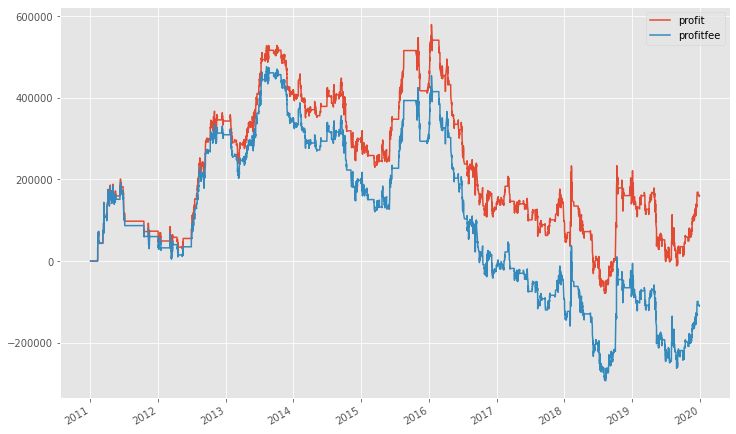

In [51]:
signal = 0
buy = []
sell = []
short = []
cover = []
profit_list = [0]
profit_with_fee_list = [0]
profit_with_fee_list_realized = [0]

for i in range(len(df_arr)):

    if i == len(df_arr):
        break

    entryLong = (df_arr[i-1, 10] < 0.015 and df_arr[i, 10] >= 0.015) and df_arr[i, 11] > df_arr[i, 12]
    entryShort = (df_arr[i-1, 10] < 0.015 and df_arr[i, 10] >= 0.015) and df_arr[i, 11] < df_arr[i, 12]
    entryCondition = date_arr[i] not in settlementDate

    exitShort = (df_arr[i-1, 10] > 0.015 and df_arr[i, 10] <= 0.015)
    exitCover = (df_arr[i-1, 10] > 0.015 and df_arr[i, 10] <= 0.015) 
    exitCondition = date_arr[i] in settlementDate and df_arr[i, 5] >= 11

    if signal == 1:
        stopLoss = df_arr[i, 3] <= df_arr[t, 0] * (1-slpoint)
    elif signal == -1:
        stopLoss = df_arr[i, 3] >= df_arr[t, 0] * (1+slpoint)
    
    if signal == 0:
        profit_list.append(0)
        profit_with_fee_list.append(0)

        if entryLong and entryCondition:
            signal = 1
            t = i + 1
            buy.append(t)

        elif entryShort and entryCondition:
            signal = -1
            t = i + 1
            short.append(t)
    
    elif signal == 1:
        profit = 200 * (df_arr[i+1, 0] - df_arr[i, 0])
        profit_list.append(profit)

        if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss:
            Pnl = 200 * (df_arr[i+1, 0] - df_arr[i, 0])
            profit_with_fee = profit - fee * 2
            profit_with_fee_list.append(profit_with_fee)
            sell.append(i+1)
            signal = 0

            profit_with_fee_realized = Pnl - fee * 2
            profit_with_fee_list_realized.append(profit_with_fee_realized)

        else:
            profit_with_fee = profit
            profit_with_fee_list.append(profit_with_fee)

    elif signal == -1:
        profit = 200 * (df_arr[i, 0] - df_arr[i+1, 0])
        profit_list.append(profit)

        if exitCover or i == len(df_arr)-2 or exitCondition or stopLoss:
            Pnl = 200 * (df_arr[i, 0] - df_arr[i+1, 0])
            profit_with_fee = profit - 2 * fee
            profit_with_fee_list.append(profit_with_fee)
            cover.append(i+1)
            signal = 0

            profit_with_fee_realized = Pnl - fee * 2
            profit_with_fee_list_realized.append(profit_with_fee_realized)

        else:
            profit_with_fee = profit
            profit_with_fee_list.append(profit_with_fee)

equity = pd.DataFrame({'profit': np.cumsum(profit_list), 'profitfee': np.cumsum(profit_with_fee_list)})
equity = equity.drop(0)
equity = equity.set_index(trainData.index)
print(equity)
equity.plot(grid = True, figsize = (12, 8))